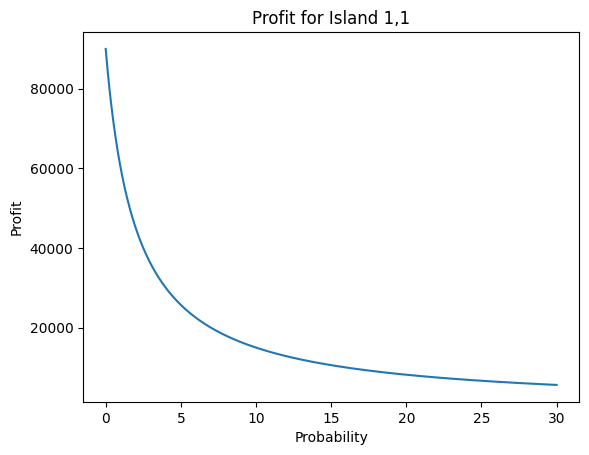

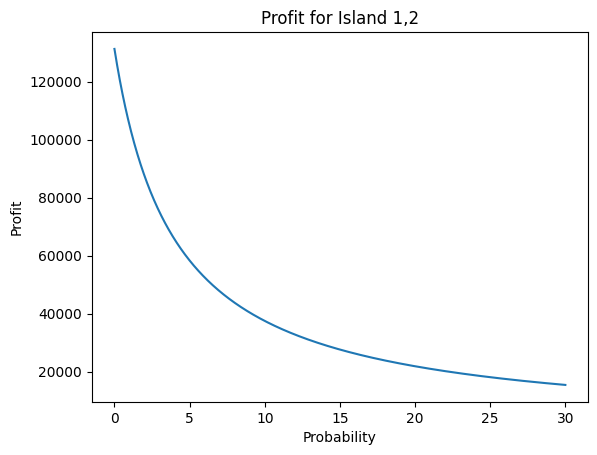

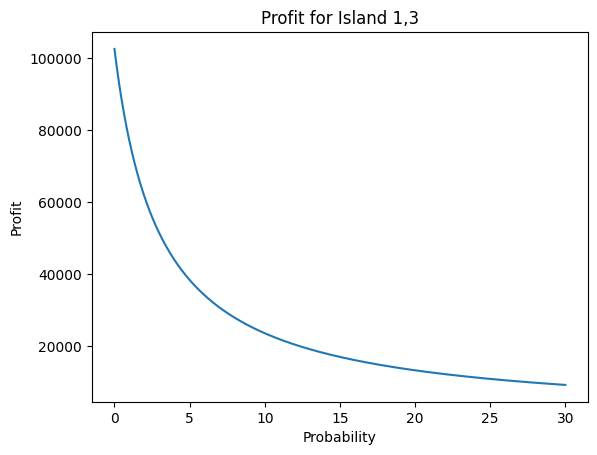

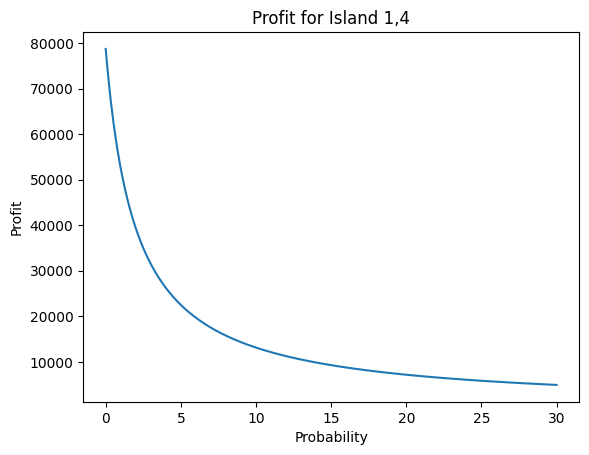

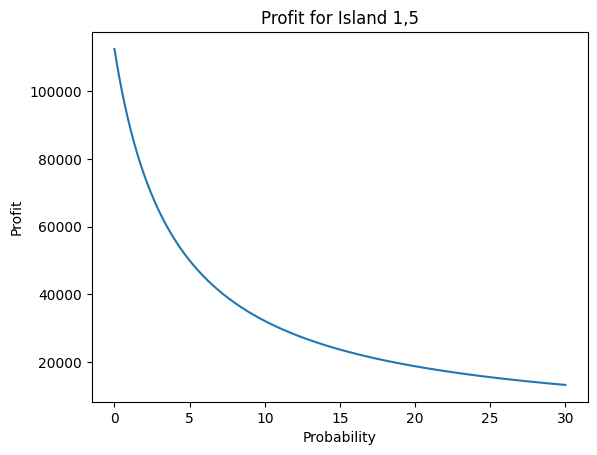

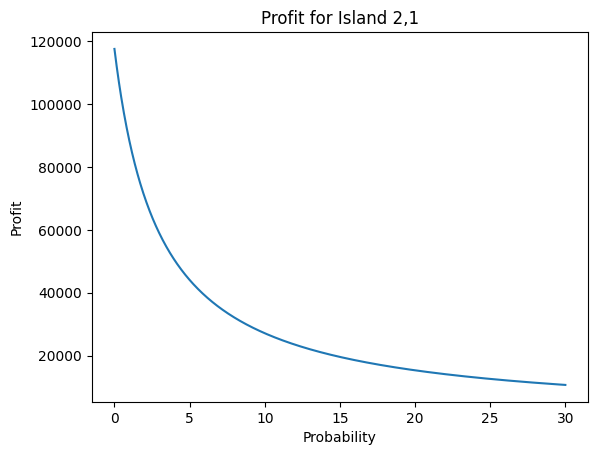

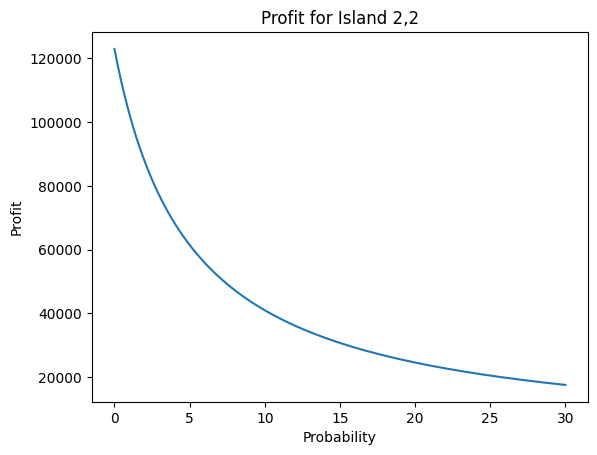

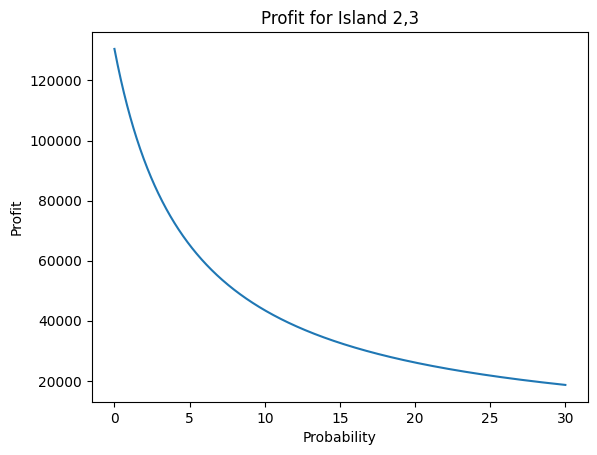

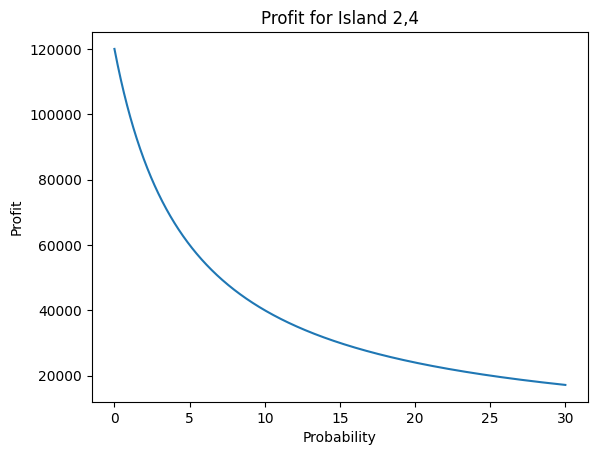

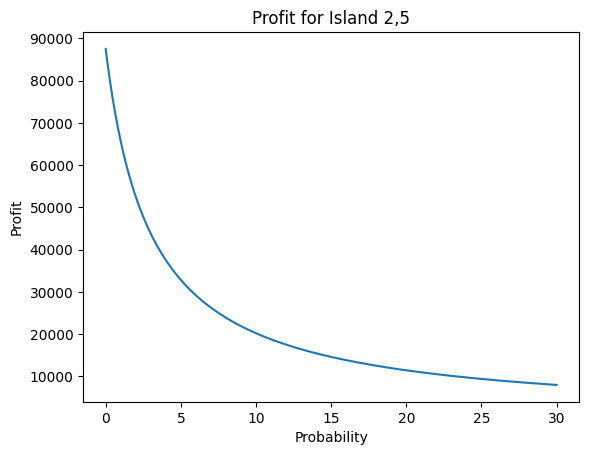

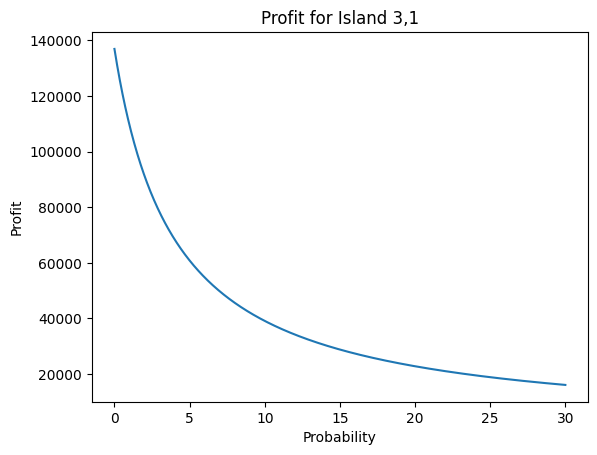

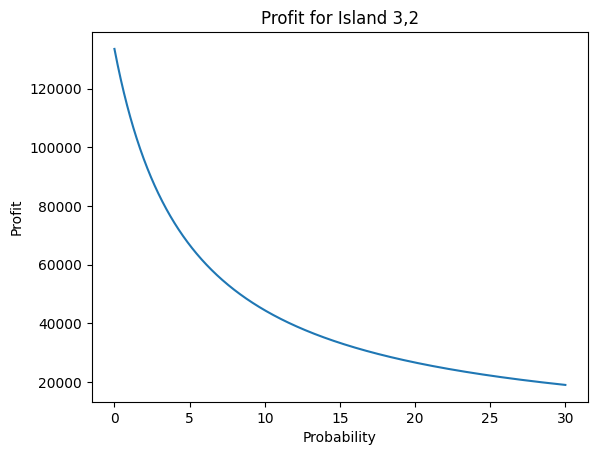

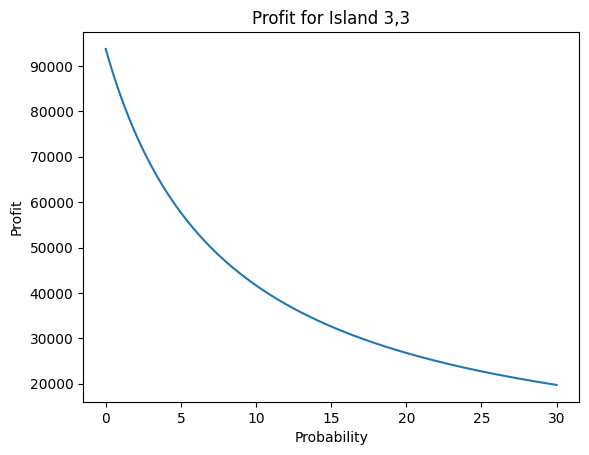

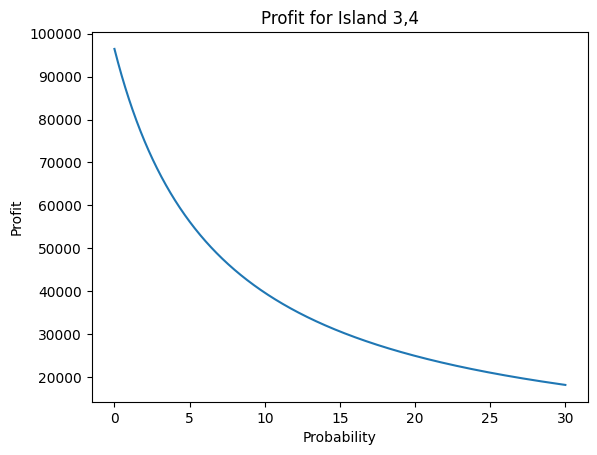

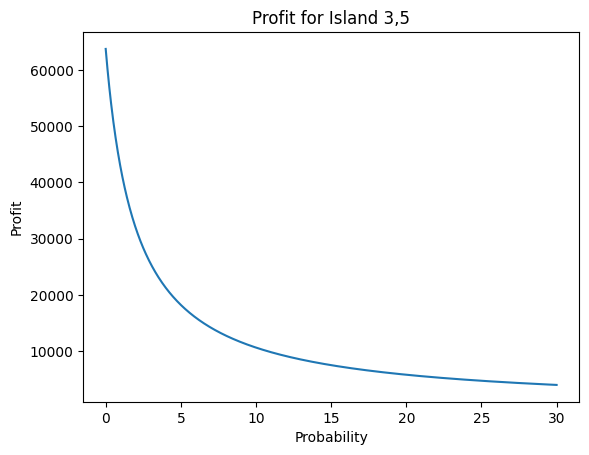

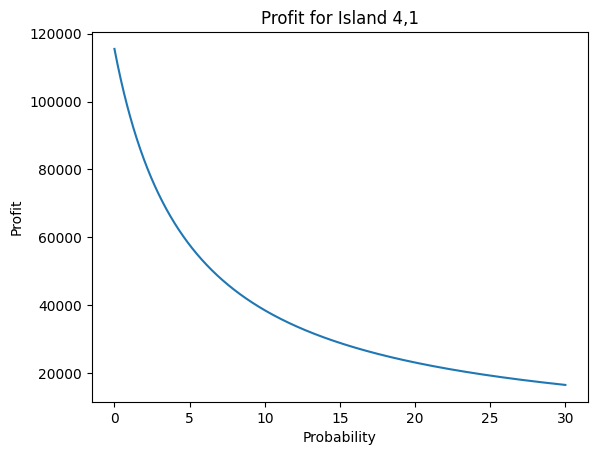

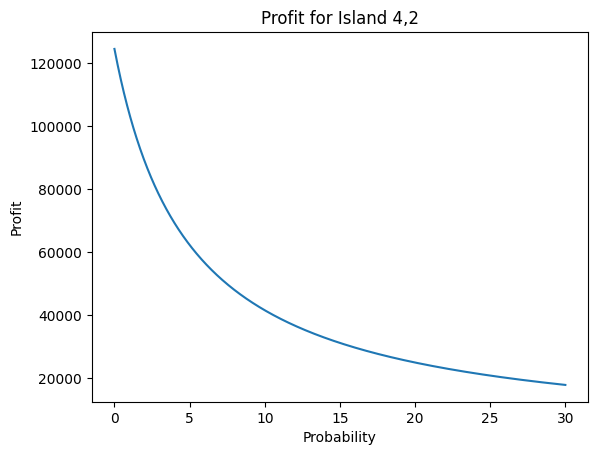

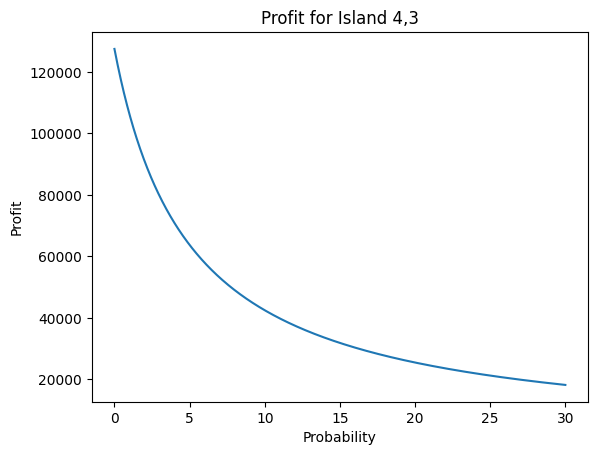

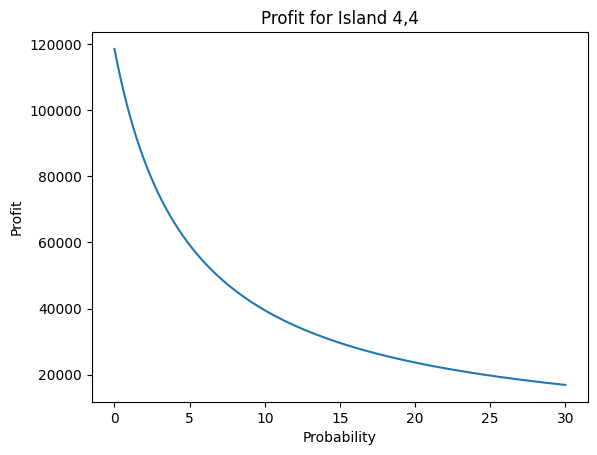

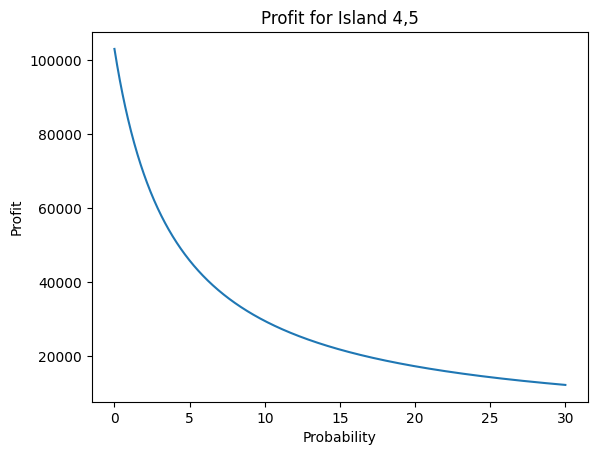

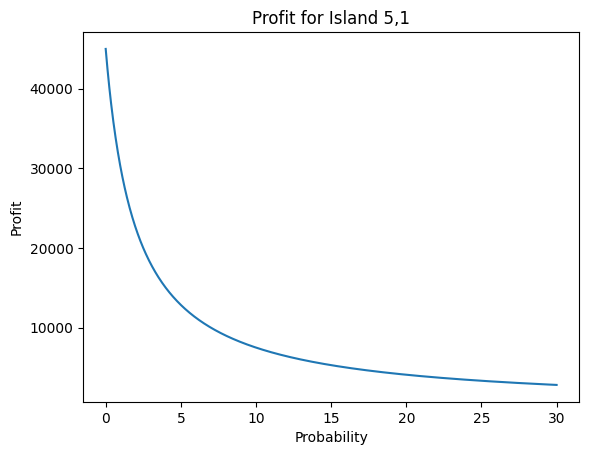

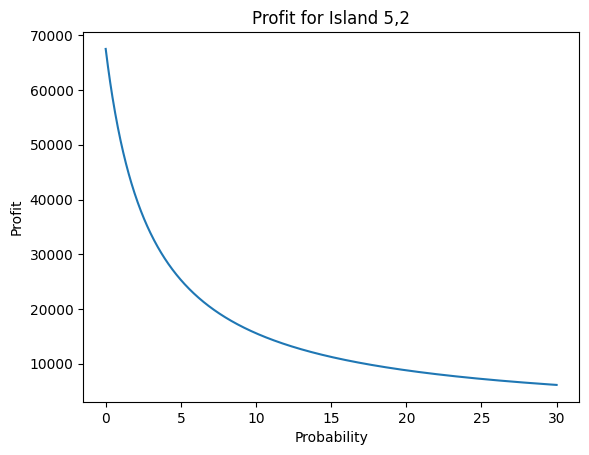

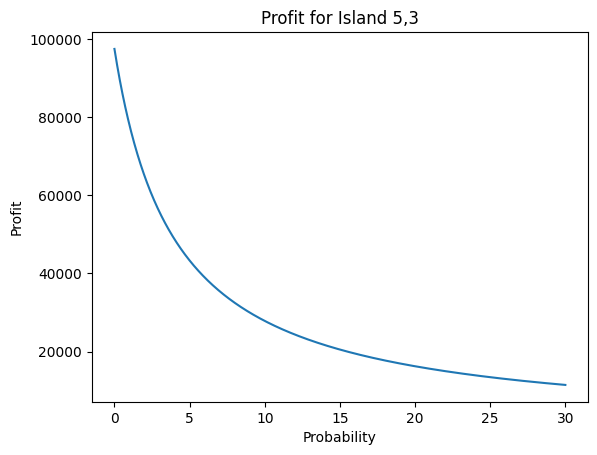

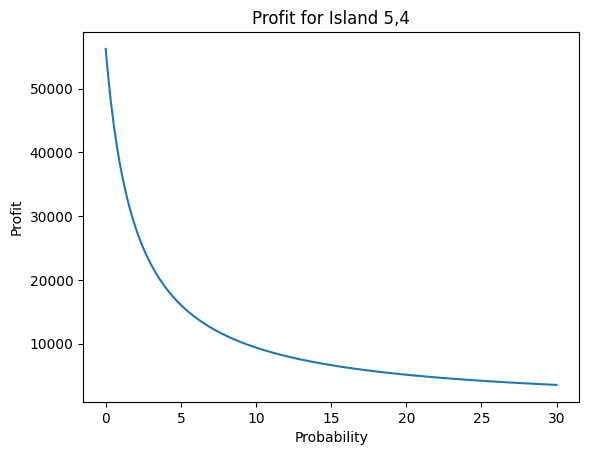

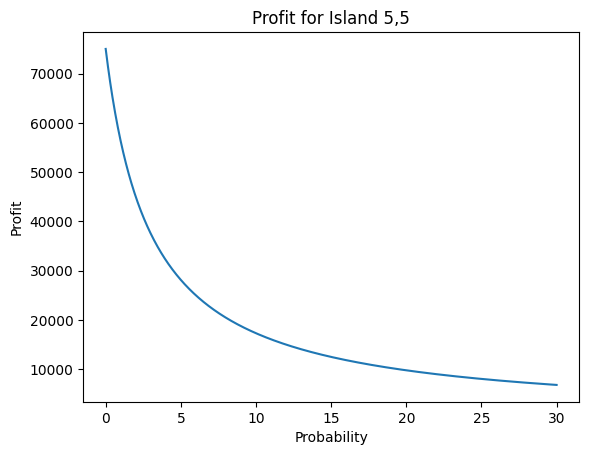

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

island_matrix = [[(24,2),(70,4),(41,3),(21,2),(60,4)],
                 [(47,3),(82,5),(87,5),(80,5),(35,3)],
                 [(73,4),(89,5),(100,8),(90,7),(17,2)],
                 [(77,5),(83,5),(85,5),(79,5),(55,4)],
                 [(12,2),(27,3),(52,4),(15,2),(30,3)]]

def calculate_profit(exp_1, exp_2=None, exp_3=None, probabilities = 0.04 * np.ones(shape=(5,5))):
    profit = 0
    #expedition 1
    profit += island_matrix[exp_1[0]][exp_1[1]][0]*7500/(island_matrix[exp_1[0]][exp_1[1]][1] + probabilities[exp_1[0]][exp_1[1]])
    if exp_2 is not None:
        profit -= 25000
        profit += island_matrix[exp_2[0]][exp_2[1]][0]*7500/(island_matrix[exp_2[0]][exp_2[1]][1] + probabilities[exp_2[0]][exp_2[1]])
    if exp_3 is not None:
        profit -= 75000
        profit += island_matrix[exp_3[0]][exp_3[1]][0]*7500/(island_matrix[exp_3[0]][exp_3[1]][1] + probabilities[exp_3[0]][exp_3[1]])
    return profit

def get_single_profit(exp, prob):
    return island_matrix[exp[0]][exp[1]][0]*7500/(island_matrix[exp[0]][exp[1]][1] + prob)


excluded = [(5,1), (5,4)]
#TODO: play with the probabilities
curr_profit = {}
for i in range(5):
    for j in range(5):
        if (i,j) in excluded:
            continue
        x = np.linspace(0, 30, 1000) 
        y = get_single_profit((i,j), x)
        plt.plot(x, y)
        plt.xlabel('Probability')
        plt.ylabel('Profit')
        plt.title(f'Profit for Island {i+1},{j+1}')
        plt.show()

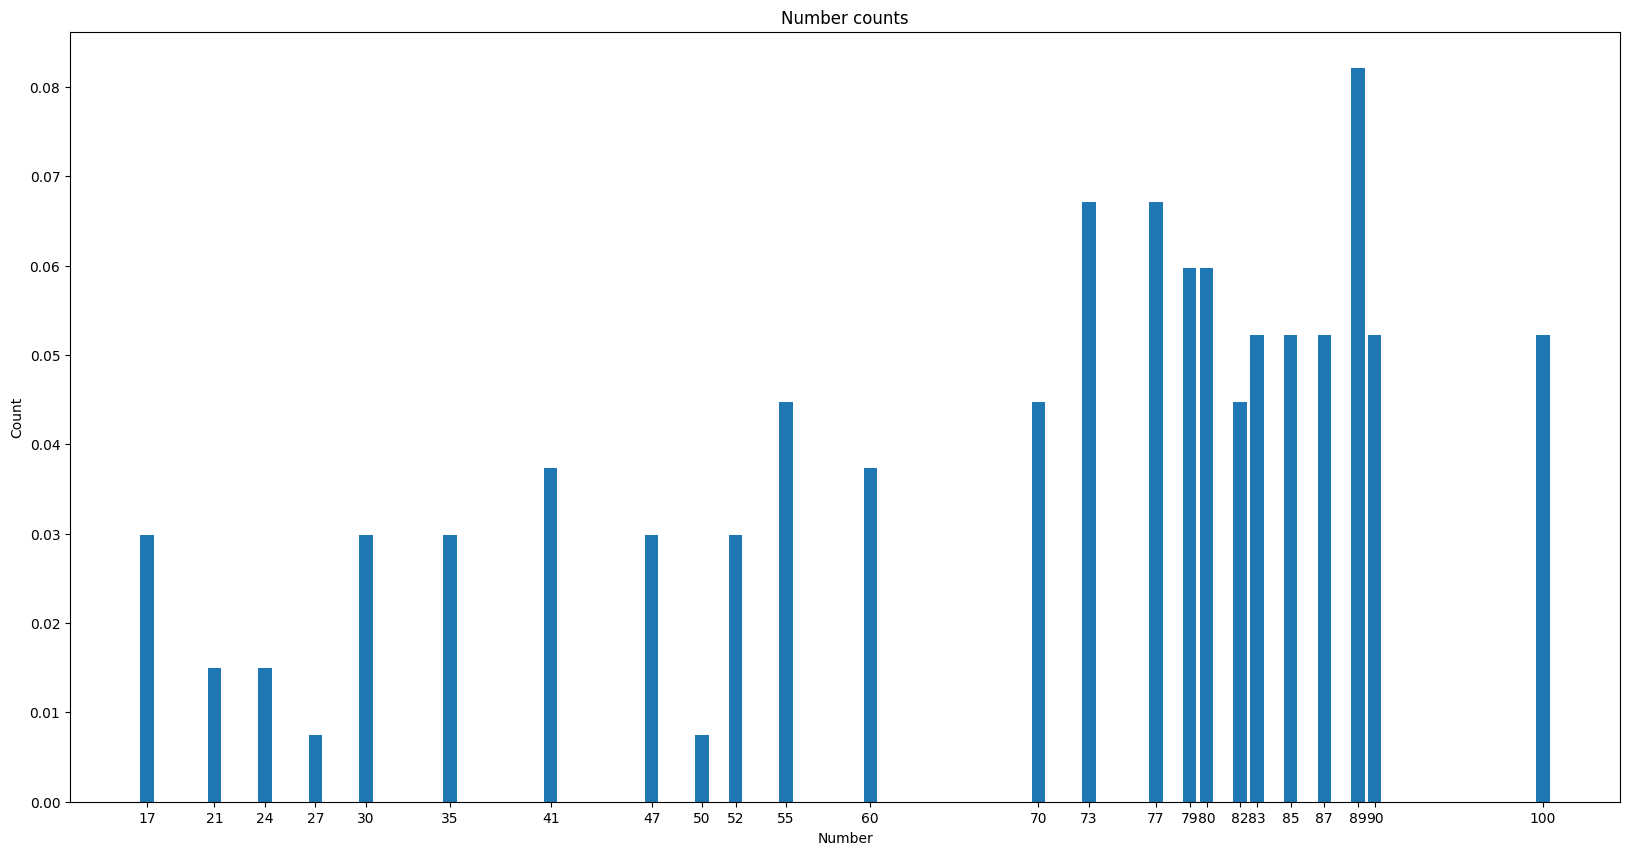

In [6]:
numbers = '''
           73	89	
100	90	89
100	90	89
70	60	
100	90	89
87	85	
47	77	60
83	55	
79	82	
24	35	
70	41	80
73	80	
52	85	
52	83	
80	90	79
89	77	52
73	77	
73	89	
85	89	
70	82	87
17	21	30
30	24	17
30	17	83
100	90	
85	87	
47	82	
82	79	
85	83	
60	47	
89	87	
77	41	
83	70	73
55	52	
79	77	47
77	27	41
80	87	
70	82	
79	73	
80	89	
87	85	
100	90	50
100	89	89
79	80	
79	60	
55	35	
73	55	
83	35	
100	82	
90	85	
80	83	
55	87	35
41	77	
80	79	
77	73	
77	41	
21	17	30
55	60	
70	73'''

numbers = numbers.replace('\t', ' ')
numbers = numbers.replace('\n', ' ')
numbers = numbers.split(' ')
numbers = [int(x) for x in numbers if x != '']
#count unique numbers with labels
unique, counts = np.unique(numbers, return_counts=True)
counts = counts / np.sum(counts)
#make plot wide
plt.figure(figsize=(20,10))
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Number counts')
plt.show()


#plot bat chart of numbers counts
for num, count in zip(unique, counts):
    expected_profit = get_single_profit((num//10-1, num%10-1), 0.04)

